# BERT를 활용한 임베딩

## Import libraries 

In [2]:
import pandas as pd 
from sentence_transformers import SentenceTransformer

# Load dataset

In [3]:
data = pd.read_table('ratings_train.txt')[:1000]
data

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1
...,...,...,...
995,10275296,미달이는.. 연예계를 바라보는 태도를 고쳐야 한다.,0
996,6473973,파괴된 관객들.,0
997,8417568,알콜중독자들 덕에 평점이 낮은가?,1
998,7126211,중견배우들이 만들어놓은 긴장감이 나름 긴장감있게 싸워보려했던 도술사들에 의해 헛웃음...,0


# BERT embedding model instance

In [4]:
model = SentenceTransformer('sentence-transformers/xlm-r-100langs-bert-base-nli-stsb-mean-tokens')

# Embedding

In [5]:
embeddings = data['document'].apply(lambda x: model.encode(x))
print(type(embeddings))
print(embeddings)


<class 'pandas.core.series.Series'>
0      [0.1199709, 0.036388524, 0.9433599, -0.0292631...
1      [0.056858446, 0.020919, 0.7253657, 0.05481379,...
2      [0.07181791, -0.018124584, 0.84919286, 0.05228...
3      [0.042829074, 0.025457421, 0.8471478, 0.046056...
4      [-0.34263313, 0.22370131, 0.23183072, 0.021585...
                             ...                        
995    [0.059183568, -0.05495318, 0.7843723, 0.078058...
996    [0.70918703, 0.030501647, 1.1195225, 0.2090562...
997    [-0.09110038, -0.062298108, -0.076109305, 0.11...
998    [-0.25541025, -0.0070737004, 0.27262616, 0.212...
999    [-0.3125313, 0.40640908, -0.24502726, -0.02903...
Name: document, Length: 1000, dtype: object


In [6]:
data['embedding'] = embeddings
data[['label','embedding']]

,label,embedding
0,0,"[0.1199709, 0.036388524, 0.9433599, -0.0292631..."
1,1,"[0.056858446, 0.020919, 0.7253657, 0.05481379,..."
2,0,"[0.07181791, -0.018124584, 0.84919286, 0.05228..."
3,0,"[0.042829074, 0.025457421, 0.8471478, 0.046056..."
4,1,"[-0.34263313, 0.22370131, 0.23183072, 0.021585..."
...,...,...
995,0,"[0.059183568, -0.05495318, 0.7843723, 0.078058..."
996,0,"[0.70918703, 0.030501647, 1.1195225, 0.2090562..."
997,1,"[-0.09110038, -0.062298108, -0.076109305, 0.11..."
998,0,"[-0.25541025, -0.0070737004, 0.27262616, 0.212..."


In [7]:
# dimensions
for idx, row in data.iterrows():
    print(row['embedding'].shape)
    break

# data

(768,)


# Train and Evaluate the Naive Bayes Classifier

In [8]:
data

,id,document,label,embedding
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0,"[0.1199709, 0.036388524, 0.9433599, -0.0292631..."
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1,"[0.056858446, 0.020919, 0.7253657, 0.05481379,..."
2,10265843,너무재밓었다그래서보는것을추천한다,0,"[0.07181791, -0.018124584, 0.84919286, 0.05228..."
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0,"[0.042829074, 0.025457421, 0.8471478, 0.046056..."
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1,"[-0.34263313, 0.22370131, 0.23183072, 0.021585..."
...,...,...,...,...
995,10275296,미달이는.. 연예계를 바라보는 태도를 고쳐야 한다.,0,"[0.059183568, -0.05495318, 0.7843723, 0.078058..."
996,6473973,파괴된 관객들.,0,"[0.70918703, 0.030501647, 1.1195225, 0.2090562..."
997,8417568,알콜중독자들 덕에 평점이 낮은가?,1,"[-0.09110038, -0.062298108, -0.076109305, 0.11..."
998,7126211,중견배우들이 만들어놓은 긴장감이 나름 긴장감있게 싸워보려했던 도술사들에 의해 헛웃음...,0,"[-0.25541025, -0.0070737004, 0.27262616, 0.212..."


# Save to a pkl
- 'pickle' library

In [9]:
import pickle 

with open('ratings_train.pkl', 'wb') as f:
    pickle.dump(data, f)

# Split dataset into train and test

In [10]:
from sklearn.model_selection import train_test_split
import numpy as np

X = np.array(data['embedding'].tolist())
y = np.array(data['label'].tolist())

print(f'{X.shape = }, {y.shape = }')

results = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = results

X.shape = (1000, 768), y.shape = (1000,)


In [11]:
from sklearn.naive_bayes import GaussianNB

# Naive Bayes Model training
nb = GaussianNB()
nb.fit(X_train, y_train)

# Make predictions
y_pred = nb.predict(X_test)

In [12]:
print(f'{y_pred = }')
print(f'{y_test = }')

y_pred = array([0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 0])
y_test = array([0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 

In [13]:
# Evaluate the classifier model
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'{accuracy = }')
print(report)

accuracy = 0.695
              precision    recall  f1-score   support

           0       0.65      0.86      0.74       101
           1       0.79      0.53      0.63        99

    accuracy                           0.69       200
   macro avg       0.72      0.69      0.69       200
weighted avg       0.72      0.69      0.69       200



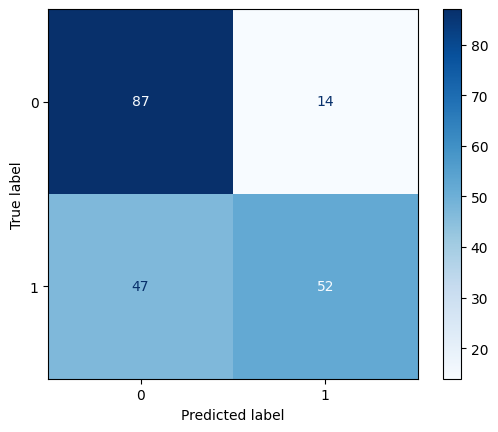

In [14]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# generate a confusion matrix
c_matrix = confusion_matrix(y_test, y_pred)

# plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=c_matrix)
disp.plot(cmap=plt.cm.Blues)
plt.show()


# Dimesionality Reduction Techniques
- Principal Component Analysis (PCA): A technique that reduces the dimensionality of the data while preserving as much variance as possible.
- t-Distributed Stochastic Neighbor Embedding (t-SNE): A technique particularly good for visualization, though not always recommended for pre-processing due to its complexity.
- Uniform Manifold Approximation and Projection (UMAP): Similar to t-SNE but often faster and better at preserving the global structure.

Autoencoders:

- Use an autoencoder neural network to compress the high-dimensional embeddings into a lower-dimensional space.

In [15]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# 2D
pca_2d = PCA(n_components=2)
X_reduced = pca_2d.fit_transform(X)
X_reduced.shape

df_reduced = pd.DataFrame(X_reduced, columns=['pc1', 'pc2'])
df_reduced.head(5)

,pc1,pc2
0,3.533238,-0.391504
1,0.188310,0.073238
2,1.151306,-0.116858
3,0.763024,-0.704177
4,-2.026243,0.786561


In [16]:
df_pca2d = pd.concat([data, df_reduced], axis=1)[['label','pc1', 'pc2']]
df_pca2d

,label,pc1,pc2
0,0,3.533238,-0.391504
1,1,0.188310,0.073238
2,0,1.151306,-0.116858
3,0,0.763024,-0.704177
4,1,-2.026243,0.786561
...,...,...,...
995,0,-0.500822,-1.315452
996,0,0.859288,-3.031604
997,1,-0.623797,-3.537641
998,0,-7.086020,-0.925477


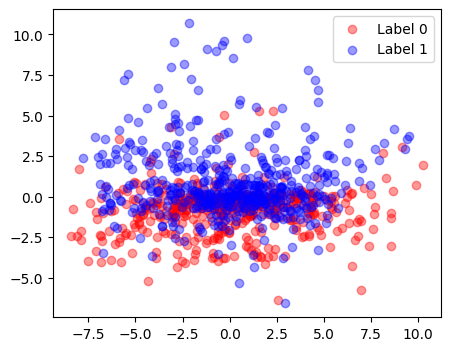

In [17]:
plt.figure(figsize=(5,4))
color = {0:'red', 1:'blue'}

for label_name in df_pca2d['label'].unique():
    df_filtered = df_pca2d.query('label==@label_name')
    plt.scatter(df_filtered['pc1'], df_filtered['pc2'], 
                c=color[label_name], label=f'Label {label_name}', alpha=0.4)

plt.legend()
plt.show()

In [18]:
# TSNE dimension reduction
tsne = TSNE(n_components=2, random_state=42)
X_tsne_2d = tsne.fit_transform(X)

X_tsne_2d.shape


(1000, 2)

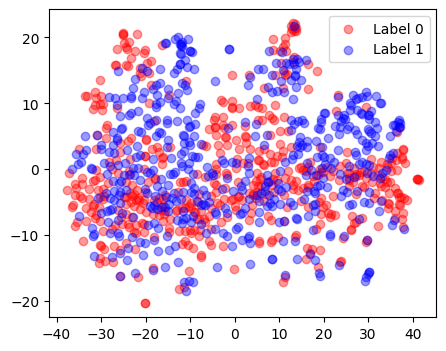

In [19]:

df_reduced = pd.DataFrame(X_tsne_2d, columns=['pc1', 'pc2'])
df_reduced.head(5)
df_pca2d = pd.concat([data, df_reduced], axis=1)[['label','pc1', 'pc2']]

plt.figure(figsize=(5,4))
color = {0:'red', 1:'blue'}

for label_name in df_pca2d['label'].unique():
    df_filtered = df_pca2d.query('label==@label_name')
    plt.scatter(df_filtered['pc1'], df_filtered['pc2'], 
                c=color[label_name], label=f'Label {label_name}', alpha=0.4)

plt.legend()
plt.show()

# Fine-tuning
- find optimized vector dimensions

차원의 저주: BERT 768 dimensions per sentence

In [37]:
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, classification_report

def naive_bayes_with_pca_fine_tuning(n_dim:int)->float:
    pca = PCA(n_components=n_dim)
    X_train_pca = pca.fit_transform(X_train) # IMPORTANT: learning completed!
    X_test_pca = pca.transform(X_test)
    
    # train Naive Bayes model
    model = GaussianNB()
    model.fit(X_train_pca, y_train)
    
    # predict
    y_pred = model.predict(X_test_pca)
    
    # evaluate
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy 

results = {}
for n_dim in range(2, 10):
    acc = naive_bayes_with_pca_fine_tuning(n_dim=n_dim)
    results[n_dim] = acc
    

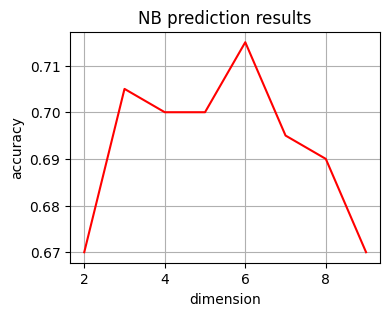

In [38]:
acc_df = pd.DataFrame.from_dict(results, orient='index', columns=['accuracy'])

plt.figure(figsize=(4,3))
plt.plot(acc_df.index, acc_df['accuracy'], c='red')
plt.title('NB prediction results')
plt.xlabel('dimension')
plt.ylabel('accuracy')
plt.grid()
plt.show()